# Method1 Huffman encoding

## Import Libraries & Load Data

In [1]:
import numpy as np
from scipy.fft import fft,fftshift
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from scipy import signal
from scipy.fftpack import fft, dct, idct
from itertools import islice 
import os
import pandas as pd

In [2]:
temp = pd.read_csv('TEMP.csv')
#temp = temp.iloc[1:]
np.savetxt('temp.txt',temp)


sampling_freq = 1/4  #This is the sampling frequency
N = temp.size  #The number of point

temp_array = temp.to_numpy() #save the data into an ndarray
temp_array.size

xf = np.linspace(-N*sampling_freq/2, N*sampling_freq/2,  N)

index = np.linspace(0, round((N-1)*sampling_freq,4), N)
temp_array_new = []
for i in temp_array:
    temp_array_new.append(list(i)[0])

TEMP data doesn't have to be filtered and resampled because of it's low sampling frequency

In [3]:
resampled_signal = temp_array_new  #This squared number need to be decided by the users
rounded_signal = np.around(resampled_signal, 3)

## Transformation

In [4]:
aN = dct(rounded_signal, type = 2, norm = 'ortho')
def return_N(target):
    if target > 1:
        for i in range(1, int(target)):
            if (2 ** i >= target):
                return i-1
    else:
        return 1


In [5]:
split_list = [1]
for i in range(0,return_N(aN.size)):
    split_list.append(2 ** i)
temp = iter(aN) 
res = [list(islice(temp, 0, ele)) for ele in split_list] 

In [6]:
cN_idct = [list(idct(res[0], type = 2, norm = 'ortho' )), list(idct(res[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res)):
    cN_idct.append(list(idct(res[k], type = 2, norm = 'ortho' )))

In [7]:
all_numbers = []
for i in cN_idct:
    for j in i:
        all_numbers.append(j)
all_numbers = np.asarray(all_numbers)
new_cN_idct = all_numbers
int_cN = np.round(new_cN_idct, 3)
np.savetxt('int_cN.txt',int_cN,fmt='%.3f')

## Run-length Encoding

In [8]:
def RLE(input_data):
    RLE_VALUE = []
    RLE_FREQ = []
    count = 0
    for i in range(0,len(input_data)):
        if i == len(input_data)-1:
            if input_data[i] != input_data[i-1]:
                RLE_VALUE.append(input_data[i])
                RLE_FREQ.append(1)
                return RLE_VALUE, RLE_FREQ
            else:
                return RLE_VALUE, RLE_FREQ
        else:
            if input_data[i] == input_data[i+1]:
                count += 1
                    
                
            else:
                RLE_VALUE.append(input_data[i])
                count += 1
                RLE_FREQ.append(count)
                count = 0

In [9]:
value, freq = RLE(int_cN)

In [10]:
np.savetxt('resampled_signal_temp.txt',resampled_signal, fmt='%.3f')
np.savetxt('temp_value_rle.txt',value, fmt='%.3f')
np.savetxt('temp_freq_rle.txt',freq, fmt='%.3f')

## Reconstruction

In [11]:
decoded_data_rle_value = np.loadtxt(fname = "temp_value_rle.txt")
decoded_data_rle_freq = np.loadtxt(fname = "temp_freq_rle.txt")

In [13]:
decoded_data_rle_freq = decoded_data_rle_freq.astype(int)
recover_signal = []
for i in range(len(decoded_data_rle_value)):
    for k in range(decoded_data_rle_freq[i]):
        recover_signal.append(decoded_data_rle_value[i])   

In [14]:
recover_signal = recover_signal 
recover_signal = list(recover_signal)

In [15]:
split_list = [1]
for i in range(0,return_N(len(recover_signal))+1):
    split_list.append(2 ** i)
temp_recovered = iter(recover_signal) 
res_recovered = [list(islice(temp_recovered, 0, ele)) for ele in split_list] 

In [16]:
recover_dct = [list(dct(res_recovered[0], type = 2, norm = 'ortho' )), list(dct(res_recovered[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered)):
    recover_dct.append(list(dct(res_recovered[k], type = 2, norm = 'ortho' )))

In [17]:
all_recover = []
for i in recover_dct:
    for j in i:
        all_recover.append(j)

In [18]:
aN_recover = idct(all_recover, type = 2, norm = 'ortho')

## PRD calculation & compare

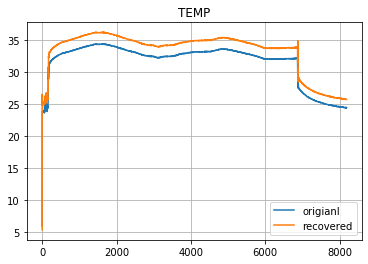

In [19]:
plt.plot(signal.resample(temp_array_new, len(aN_recover)),label = "origianl" )
plt.plot(aN_recover, label = "recovered")
plt.legend()
plt.title('TEMP')
plt.grid()
plt.show()

In [20]:
resampled_signal_shorter = signal.resample(temp_array_new, len(aN_recover))
#resampled_signal_shorter = resampled_signal[:len(aN_recover)] 
from sklearn.metrics import mean_squared_error
from math import sqrt

def PRD_calculation(original_signal, compressed_signal):
    PRD = sqrt(sum((original_signal-compressed_signal)**2)/(sum(original_signal**2)))
    return PRD

PRD = PRD_calculation(resampled_signal_shorter, aN_recover)
print("The PRD is {}%".format(PRD*100))

The PRD is 5.31361019211389%
